## Problem Statement:
   -  This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker to predict the Income of the person.
 
 Output : To predict whether a person makes an income >50K / Year or not.

Importing the required Libraries for this project,

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [2]:
ci = pd.read_csv("census_income.csv")
ci

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


- There are 32560 rows and 15 columns in this dataset and we have categorical and numerical columns in this dataset.
- We need to encode the categorical data's and need to check target variable classes balanced and imbalanced and check outliers /skewness.


 We will check this in later part of this project.

In [3]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Info() method will give datatypes of each column and non - null count of each column and memory usage.

In [4]:
ci.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As we can see there is no null values present in dataset,So data is pretty cleaned.So we will check further on this.

In [5]:
ci.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Describe() method will give the summary of the dataset and this method will display the summary for numerical dataset by default.

This will help us to do analysis on outliers/skewness and checking whether null values present in dataset or not by looking into count,min and max values and mean and standard deviation and quantile values.

In [6]:
ci.describe(include = object)

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


This describe "include = object" will give the brief of the categorical data and most repeated values in the dataset.

We will see how the data has been distributed in the dataset and histogram is showing for only numerical data and we will see how the categorical data is distributed in dataset.

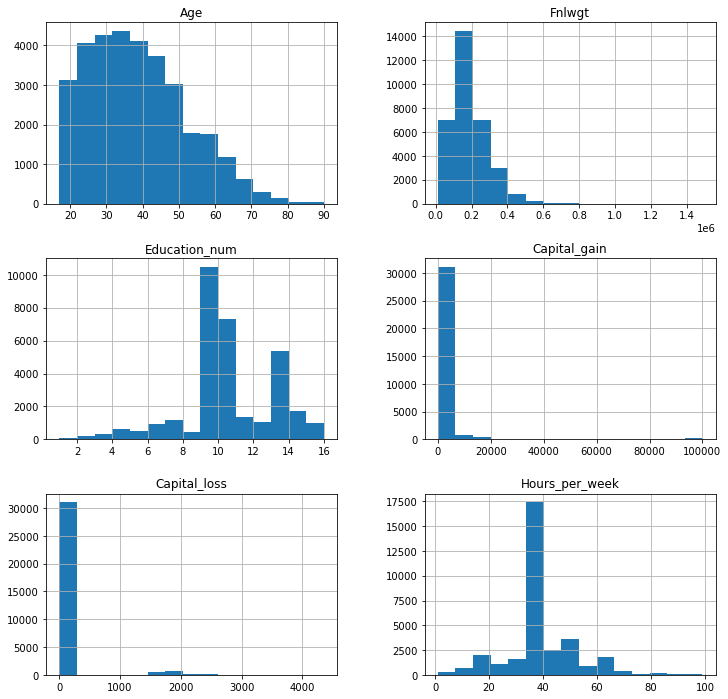

In [7]:
ci.hist(figsize = (12,12),bins = 15)
plt.show()

As per the above plot, We can see that ,
    - final weight has skewness of right side and 
    - education num column has negative side skewness and 
    - we can see max number of skewness in capital loss and capital gain and
    - age column has normal distribution and hours per week has moderate skewness towards right.

In [8]:
ci['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:>

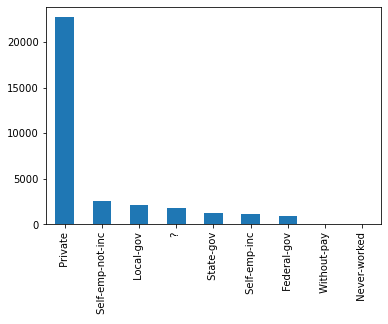

In [9]:
ci['Workclass'].value_counts().plot.bar()

As per the above plot, we observed that most of the people workclass are private in census and we observed a ? in this column and it has some counts of 1836 in that column so I think this will not be considered as missing values in the dataset as it might be the people would have missed this field or choose not to disclose.

So we will handle this in later part !!!

In [10]:
ci['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:>

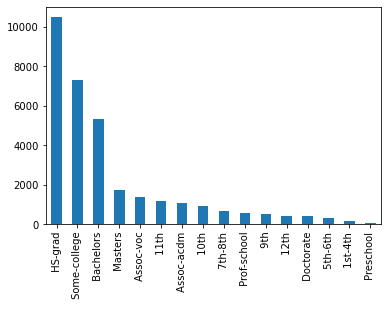

In [11]:
ci['Education'].value_counts().plot.bar()

Most of the people has their education of  "HS-grad" and some have been to college and few has completed the bachelors degree.

In [12]:
ci['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<AxesSubplot:>

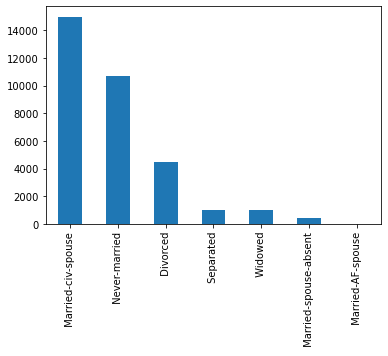

In [13]:
ci['Marital_status'].value_counts().plot.bar()

Most of the people are married vid spouse in census in terms of marital status and some are never married and few are divorced and we can see very few for rest of them like widowed,separated as per the above bar plot

In [14]:
ci['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<AxesSubplot:>

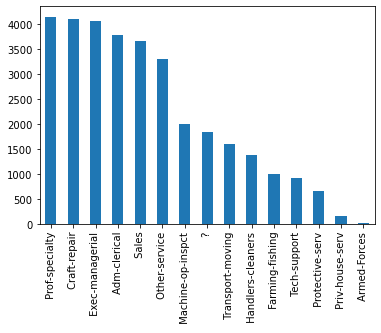

In [15]:
ci['Occupation'].value_counts().plot.bar()

As per the above plot, we observed that most of the people occupation are belongs to "prof speciality", "repair"," managerial" and we can see very very few in armed forces and hosue servant.

In this column as well ,we can see that ? that people do not want to disclose their occupation or missed it by error /manually or due to any other reasons.

In [16]:
ci['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

<AxesSubplot:>

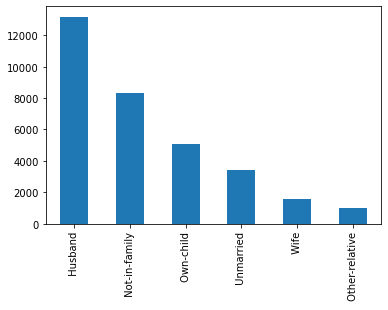

In [17]:
ci['Relationship'].value_counts().plot.bar()

Most of the people relationships are "Husband"  is having high in counts and it might be the census is taken with the head of the family relationship with that family.

In [18]:
ci['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<AxesSubplot:>

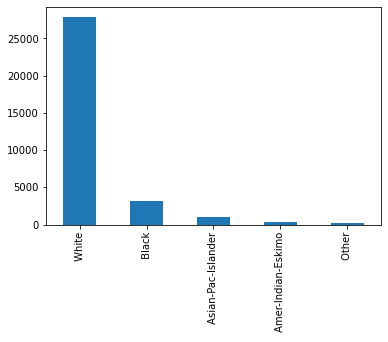

In [19]:
ci['Race'].value_counts().plot.bar()

White people are more in terms of race in census than other categories in race.

In [20]:
ci['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

<AxesSubplot:>

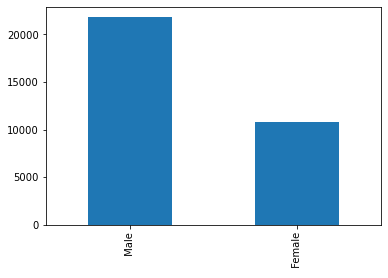

In [21]:
ci['Sex'].value_counts().plot.bar()

So male is more in gender than female as per the plot

In [22]:
ci['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

We can see there are more native country in census and it has ? as wellso we will deal this in next part and as per the count given,We can tell that most of people who has given this census belongs to United States.

In [23]:
ci['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:>

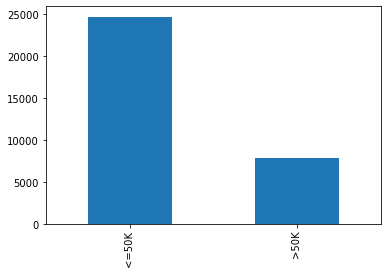

In [24]:
ci['Income'].value_counts().plot.bar()

here Income is our target variable and we can see that most people income are <= 50K.

So far from the categorical data distribution, It is observed that most of the people marital status is married vid spuse and gender is male and they belongs to white race of people and more people work class is private and their education is HS - Grad and most people are from United States and we observed that most of the people income is <=50K which is our prediction here in this project.

We can't conclude with this data only  as our data will have anamoly's ie.e outliers and it will lead us to mis-interpretation of data.

So we will do data cleaning / preprocessing our data and try building different models and check their accuracy.

Splitting the categorical and numerical column for further encoding, outliers / skewness removal,

In [25]:
num = ci.select_dtypes(exclude = object)
cat = ci.select_dtypes(include = object)

In [26]:
num

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [27]:
cat

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


We can't replace ? to mean/median/mode as it causes the data to be mis -interpret.
As per the given dataset, ? indicates a not known value as it might be chosen not to disclose or missed during typing or typo errors or it can be due to anything and that can't be interpret using mean / median / mode.

So I am using below replace() method to replace it with 'not known category'.

In [28]:
coll = ['Workclass','Occupation','Native_country']
for col in coll:
    cat[col] = cat[col].str.strip().replace({'?': 'None'})

As it is a string and has extra space,so I am removing it using strip () method and replacing this with "None" value for the given column which is having ?

In [29]:
#We can see that ? has been replaced with None

cat['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
None                 1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

Applying Encoding techniques to categorical data and I am using LabelEncoder() here to convert categorical to numerical data,

In [30]:
le = LabelEncoder()
cat = cat.apply(le.fit_transform)

In [31]:
cat

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,6,9,2,3,0,4,1,39,0
1,4,11,0,5,1,4,1,39,0
2,4,1,2,5,0,2,1,39,0
3,4,9,2,10,5,2,0,4,0
4,4,12,2,3,5,4,0,39,0
...,...,...,...,...,...,...,...,...,...
32555,4,7,2,13,5,4,0,39,0
32556,4,11,2,6,0,4,1,39,1
32557,4,11,6,0,4,4,0,39,0
32558,4,11,4,0,3,4,1,39,0


Using dist plot to check how the numerical data has been distributed and we can't apply outliers / skewness to any categorical data even though encoded it to numerical data.

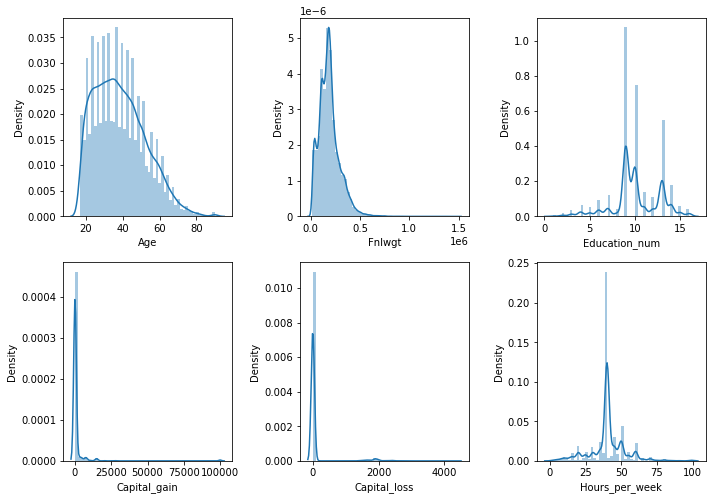

In [32]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in num:
    if pltnumber<=6:
        ax = plt.subplot(3,3,pltnumber)
        sns.distplot(num[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

We can see there are more outliers exist in almost all columns.

Tried applying Z score method and it is not removing complete outliers, so going to try with simple quantile method as we have less columns, I am using this method.

If we have more than columns,we can't use this method as it will take time for each and every column.

We can see that first "Age" column is having outliers at upper side, after applying quantile method, it has been reduced.

<AxesSubplot:xlabel='Age'>

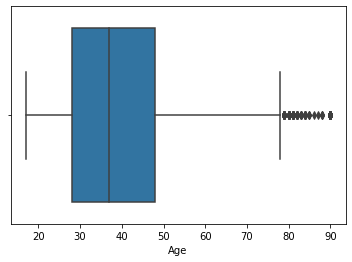

In [33]:
sns.boxplot(num['Age'])

<AxesSubplot:xlabel='Age'>

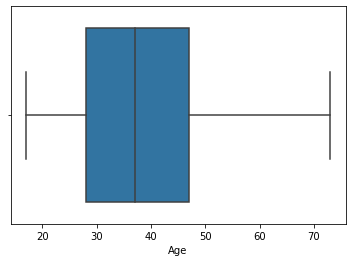

In [34]:
quant = num['Age'].quantile(0.99)
new = num['Age'][num['Age']< quant]
sns.boxplot(new)

Same goes for this column as well, It has been reduced after applying quantile for .95

<AxesSubplot:xlabel='Fnlwgt'>

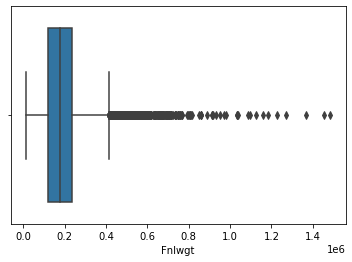

In [35]:
sns.boxplot(num['Fnlwgt'])

<AxesSubplot:xlabel='Fnlwgt'>

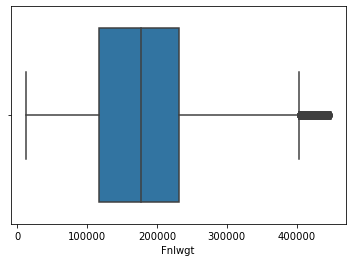

In [36]:
quant = num['Fnlwgt'].quantile(0.98)
new = num['Fnlwgt'][num['Fnlwgt']<quant]
sns.boxplot(new)

Education num col is having outliers on lower side and here I have removed .02 in quantile method.

<AxesSubplot:xlabel='Education_num'>

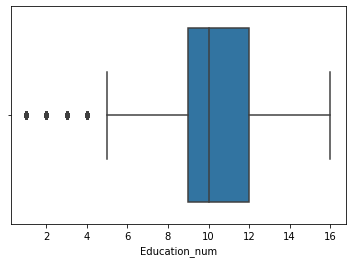

In [37]:
sns.boxplot(num['Education_num'])

<AxesSubplot:xlabel='Education_num'>

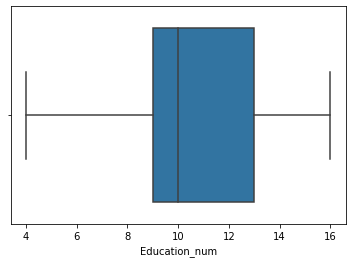

In [38]:
quant = num['Education_num'].quantile(0.01)
new = num['Education_num'][num['Education_num']>quant]
sns.boxplot(new)

In [39]:
num['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64

Here capital_gain has  the data of having value as 0 and remaing values are showing as outliers and on trying to remove the outliers, We are losing max number of data and it is same for Capital_loss as well

<AxesSubplot:xlabel='Capital_gain'>

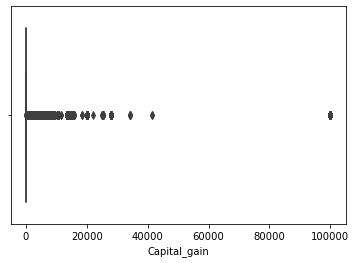

In [40]:
sns.boxplot(num['Capital_gain'])

<AxesSubplot:xlabel='Capital_gain'>

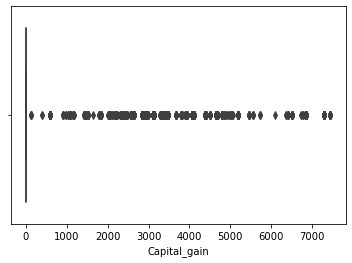

In [41]:
quant = num['Capital_gain'].quantile(0.97)
new = num['Capital_gain'][num['Capital_gain']<quant]
sns.boxplot(new)

<AxesSubplot:xlabel='Capital_loss'>

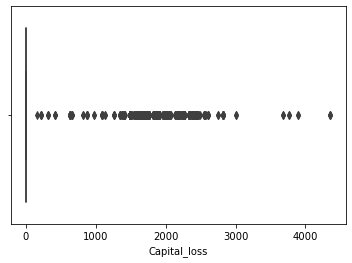

In [42]:
sns.boxplot(num['Capital_loss'])

<AxesSubplot:xlabel='Capital_loss'>

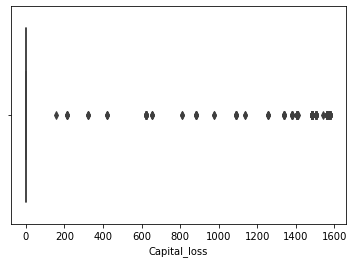

In [43]:
quant = num['Capital_loss'].quantile(0.96)
new = num['Capital_loss'][num['Capital_loss']<quant]
sns.boxplot(new)

Hours_per_week column has outliers on upper and lower side and it's need to be removed.

<AxesSubplot:xlabel='Hours_per_week'>

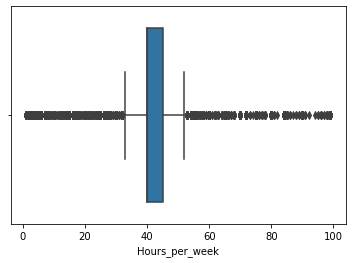

In [44]:
sns.boxplot(num['Hours_per_week'])

<AxesSubplot:xlabel='Hours_per_week'>

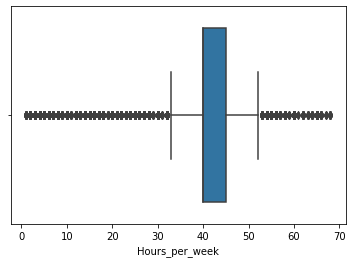

In [45]:
quant = num['Hours_per_week'].quantile(0.98)
new = num['Hours_per_week'][num['Hours_per_week']<quant]
sns.boxplot(new)

<AxesSubplot:xlabel='Hours_per_week'>

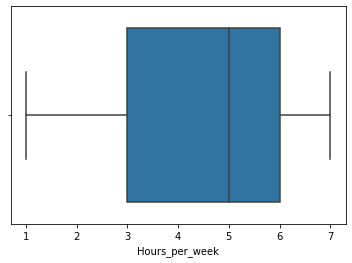

In [46]:
quant = num['Hours_per_week'].quantile(0.01)
new = num['Hours_per_week'][num['Hours_per_week']<quant]
sns.boxplot(new)

Applying quantile method to remove the data.
As Capital_loss and Capital_gain is having 0 has most of the values ,When we try to remove this,we are losing max number of data.so skipping that two columns.

In [47]:
quant1 = num['Age'].quantile(0.99)
quant2 = num['Fnlwgt'].quantile(0.98)
quant3 = num['Education_num'].quantile(0.01)
#quant4 = num['Capital_loss'].quantile(0.97)
#quant5 = num['Capital_gain'].quantile(0.97)
quant6 = num['Hours_per_week'].quantile(0.98)
quant7 = num['Hours_per_week'].quantile(0.01)


In [48]:
print(num.shape)
num = num[num['Age'] <quant1]
print(num.shape)
num = num[num['Fnlwgt'] <quant2]
print(num.shape)
num = num[num['Education_num'] >quant3]
print(num.shape)
num = num[num['Hours_per_week'] <quant6]
print(num.shape)
num = num[num['Hours_per_week'] >quant7]
print(num.shape)

(32560, 6)
(32223, 6)
(31571, 6)
(31066, 6)
(30301, 6)
(29930, 6)


% loss of data is 8% and <10% is acceptable Hence proceeding with further

In [49]:
num.skew()

Age                0.403947
Fnlwgt             0.505539
Education_num      0.006206
Capital_gain      12.207395
Capital_loss       4.537276
Hours_per_week    -0.456895
dtype: float64

We can see that data is having skewness in capital loss and capital gain and I didnt remove those column as it didnt make any great difference in accuracy of model after removing as well.So keeping those features and going to build a model.

We will check correlation between features VS features and  features VS target variables.

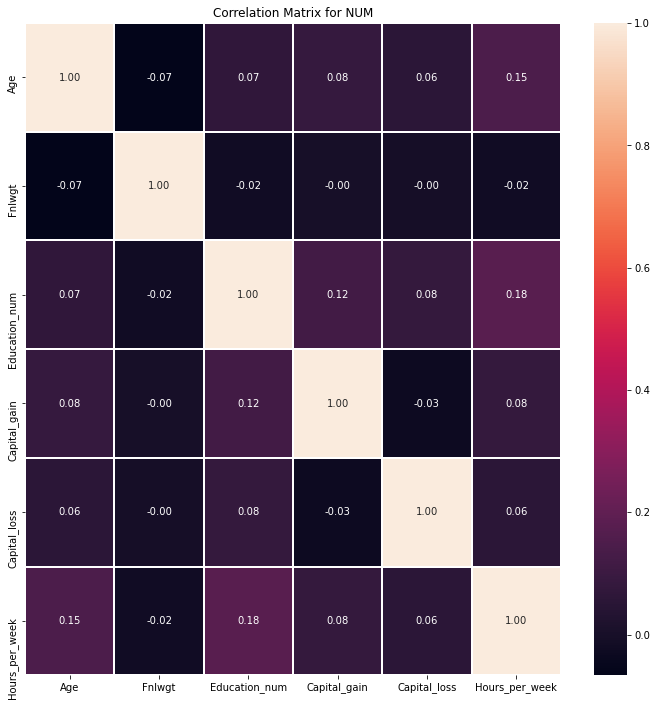

In [50]:
corr = num.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True,fmt = '.2f',linewidths = 1.0)
plt.title("Correlation Matrix for NUM")
plt.show()

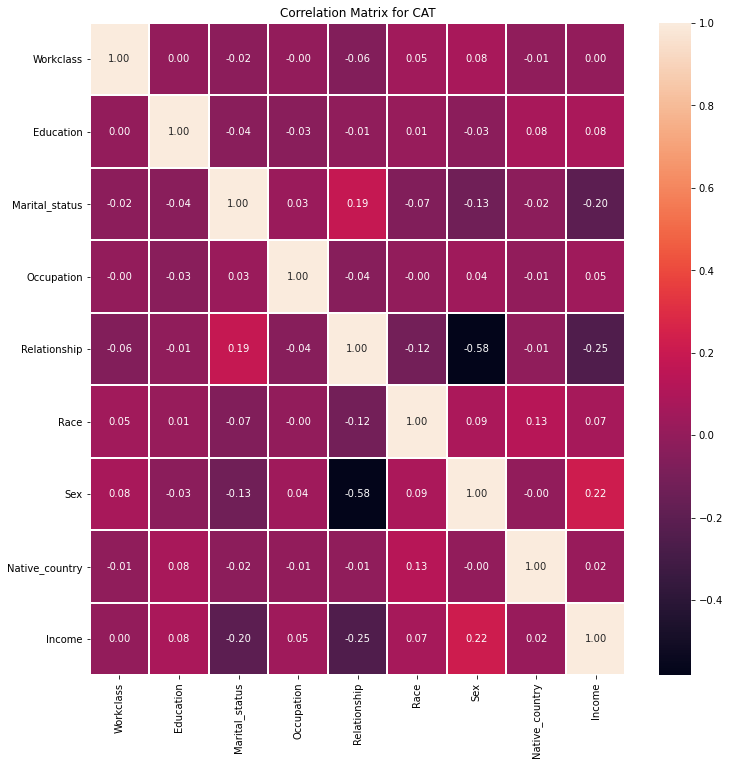

In [51]:
corr = cat.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True,fmt = '.2f',linewidths = 1.0)
plt.title("Correlation Matrix for CAT")
plt.show()

As we can see there is no corrleation exist,I am going further and merging both numerical and categorical column for further model building.

In [52]:
df = pd.concat([num,cat],axis = 1)
df

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,50.0,83311.0,13.0,0.0,0.0,13.0,6,9,2,3,0,4,1,39,0
1,38.0,215646.0,9.0,0.0,0.0,40.0,4,11,0,5,1,4,1,39,0
2,53.0,234721.0,7.0,0.0,0.0,40.0,4,1,2,5,0,2,1,39,0
3,28.0,338409.0,13.0,0.0,0.0,40.0,4,9,2,10,5,2,0,4,0
4,37.0,284582.0,14.0,0.0,0.0,40.0,4,12,2,3,5,4,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,257302.0,12.0,0.0,0.0,38.0,4,7,2,13,5,4,0,39,0
32556,40.0,154374.0,9.0,0.0,0.0,40.0,4,11,2,6,0,4,1,39,1
32557,58.0,151910.0,9.0,0.0,0.0,40.0,4,11,6,0,4,4,0,39,0
32558,22.0,201490.0,9.0,0.0,0.0,20.0,4,11,4,0,3,4,1,39,0


In [53]:
# dropping the na columns
df = df.dropna()
df = df.reset_index(drop= True)

In [54]:
df.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,50.0,83311.0,13.0,0.0,0.0,13.0,6,9,2,3,0,4,1,39,0
1,38.0,215646.0,9.0,0.0,0.0,40.0,4,11,0,5,1,4,1,39,0
2,53.0,234721.0,7.0,0.0,0.0,40.0,4,1,2,5,0,2,1,39,0
3,28.0,338409.0,13.0,0.0,0.0,40.0,4,9,2,10,5,2,0,4,0
4,37.0,284582.0,14.0,0.0,0.0,40.0,4,12,2,3,5,4,0,39,0


In [55]:
df.shape

(29930, 15)

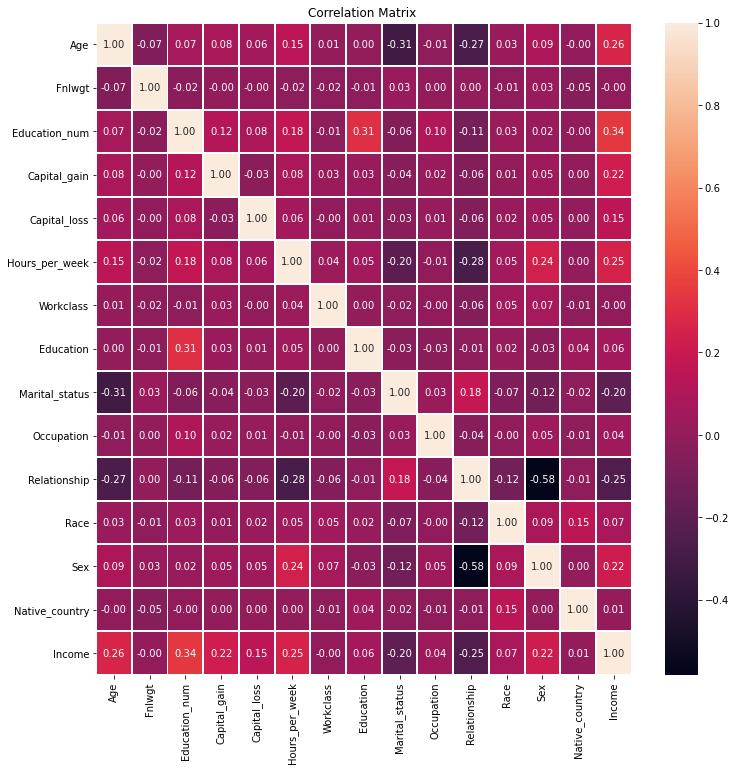

In [56]:
# Checking the correlation matrix for newly  combined numerical and categorical columns dataset.

corr = df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True,fmt = '.2f',linewidths = 1.0)
plt.title("Correlation Matrix ")
plt.show()

It is clear that we do not have any correlation for features and target variables, We will proceed to next step which is ,
    Splitting X and Y variables,

In [57]:
X = df.drop(columns = ['Income'],axis = 1)
y = df['Income']

In [58]:
y.value_counts()

0    22610
1     7320
Name: Income, dtype: int64

We will plot the target variable using countplot to check whether target variable classes are balanced or not,

As we can see it is not balanced,we should balance this class using sampling technique

<AxesSubplot:xlabel='Income', ylabel='count'>

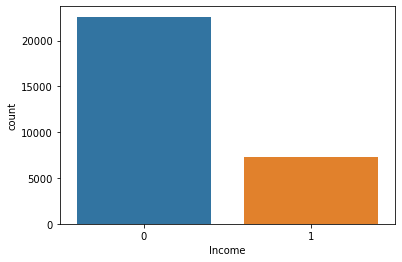

In [59]:
sns.countplot(df['Income'])

Using SMOTE() technique to balance the classes and also known as OVER-SAMPLING Technique which will increase the minority class to majority class to balance both the classes.

In [60]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_over,y_over = sm.fit_resample(X,y)

<AxesSubplot:xlabel='Income', ylabel='count'>

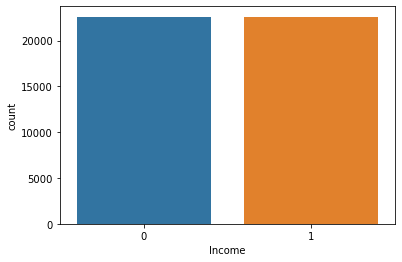

In [61]:
#Now our classes are balanced,
sns.countplot(y_over)

Applying Scaler technique to equalize the range of data to mean 0 and standard deviation 1 for equal distribution of range of values.

In [62]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x_over)

Train test Split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y_over, test_size = 0.20, random_state = 101)

## Model Building :

    Here I am gonna train and test the dataset using different algorithms of model and we will choose the best model using F1 score accuracy as the target variables are imbalanced and balanced using resampling technique,We can use f1 score metrics as accuracy,
    
    1) Decision Tree Classifier
    2) Random Forest Classifier
    3) Logistic Regression
    4) Ada Boost Classifier
    5) Gradient Boosting Classifier

Model 1 : DECISON TREE CLASSIFIER

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("F1 Score \n", f1_score(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.8570322865988501
Confusion Matrix 
 [[3917  661]
 [ 632 3834]]
F1 Score 
 0.8557080682959491
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4578
           1       0.85      0.86      0.86      4466

    accuracy                           0.86      9044
   macro avg       0.86      0.86      0.86      9044
weighted avg       0.86      0.86      0.86      9044

ROC AUC Score 
 0.8570500732000258


Model 2 : RANDOM FOREST CLASSIFIER

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("F1 Score \n", f1_score(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.8919725785050863
Confusion Matrix 
 [[4126  452]
 [ 525 3941]]
F1 Score 
 0.8897166723106446
Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      4578
           1       0.90      0.88      0.89      4466

    accuracy                           0.89      9044
   macro avg       0.89      0.89      0.89      9044
weighted avg       0.89      0.89      0.89      9044

ROC AUC Score 
 0.8918560349278476


Model 3: LOGISTIC REGRESSION

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("F1 Score \n", f1_score(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.7871517027863777
Confusion Matrix 
 [[3539 1039]
 [ 886 3580]]
F1 Score 
 0.7881122729774352
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      4578
           1       0.78      0.80      0.79      4466

    accuracy                           0.79      9044
   macro avg       0.79      0.79      0.79      9044
weighted avg       0.79      0.79      0.79      9044

ROC AUC Score 
 0.7873285893690828


Model 4: ADA BOOST CLASSIFIER

In [67]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("F1 Score \n", f1_score(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.8748341441839894
Confusion Matrix 
 [[3998  580]
 [ 552 3914]]
F1 Score 
 0.8736607142857142
Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4578
           1       0.87      0.88      0.87      4466

    accuracy                           0.87      9044
   macro avg       0.87      0.87      0.87      9044
weighted avg       0.87      0.87      0.87      9044

ROC AUC Score 
 0.8748532918099511


Model 5: GRADIENT BOOST CLASSIFIER

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("F1 Score \n", f1_score(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.8890977443609023
Confusion Matrix 
 [[4109  469]
 [ 534 3932]]
F1 Score 
 0.886883951731138
Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4578
           1       0.89      0.88      0.89      4466

    accuracy                           0.89      9044
   macro avg       0.89      0.89      0.89      9044
weighted avg       0.89      0.89      0.89      9044

ROC AUC Score 
 0.8889917158661227


ROC Curve for all models

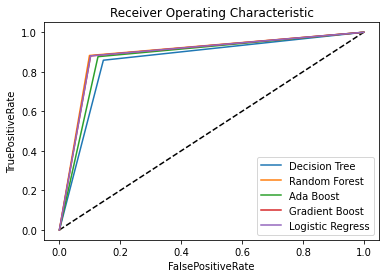

In [69]:
y_pred_prob1 = dt.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = rfc.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = abc.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = gbc.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = lr.predict(x_test)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob4)



plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Random Forest")
plt.plot(fpr3, tpr3, label= "Ada Boost")
plt.plot(fpr4, tpr4, label= "Gradient Boost")
plt.plot(fpr5, tpr5, label= "Logistic Regress")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

Applying Cross validation Score for all the above models to check whether the model accuracy is over fit and under-fit.

In [70]:
scr_dt = cross_val_score(dt,x_over,y_over,cv=5)
print("CV Score of DT :", scr_dt.mean())

CV Score of DT : 0.8515922158337019


In [71]:
scr_rfc = cross_val_score(rfc,x_over,y_over,cv=5)
print("CV Score of RFC :", scr_rfc.mean())

CV Score of RFC : 0.8837682441397613


In [72]:
scr_log = cross_val_score(lr,x_over,y_over,cv=5)
print("CV Score of LOG :", scr_log.mean())

CV Score of LOG : 0.6781954887218045


In [73]:
scr_abc = cross_val_score(abc,x_over,y_over,cv=5)
print("CV Score of ABC :", scr_abc.mean())

CV Score of ABC : 0.8649491375497569


In [74]:
scr_gbc = cross_val_score(gbc,x_over,y_over,cv=5)
print("CV Score of GBC :", scr_gbc.mean())

CV Score of GBC : 0.8771782397169394


Finding the difference of F1 Score accuracy and cross validation score accuracy and the model which is having less difference is considered as best model and applying Hyper parameter tuning to increase the accuracy of that model.

Here depends on above methodology, I am using "RANDOM FOREST" as best model.

Let's try to increase the accuracy and see,

In [75]:
param = {'criterion' : ['gini','entropy'] ,
         'splitter': ['best','random'], 
         'max_depth':[10,12,14,16,18,20,22,25],
         'random_state' : [None],
         'max_leaf_nodes': [10,12,14,16,18],
         'min_samples_leaf':[2,4,6,8,10,12],
         'max_features': [10,12,14,16,18,20,25]
          }

In [76]:
grid_search = GridSearchCV(dt,param_grid = param, cv=5)

In [77]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 16, 18, 20, 22, 25],
                         'max_features': [10, 12, 14, 16, 18, 20, 25],
                         'max_leaf_nodes': [10, 12, 14, 16, 18],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12],
                         'random_state': [None],
                         'splitter': ['best', 'random']})

In [78]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': 12,
 'max_leaf_nodes': 18,
 'min_samples_leaf': 4,
 'random_state': None,
 'splitter': 'best'}

In [135]:
final = DecisionTreeClassifier(splitter = 'best', criterion = 'gini', max_depth = 34, 
                               min_samples_leaf =24,max_leaf_nodes = 36 ,random_state = None)

final.fit(x_train,y_train)
pred = final.predict(x_test)

print("Accuracy score \n", accuracy_score(y_test,pred))
print("Confusion Matrix \n", confusion_matrix(y_test,pred))
print("F1 Score \n", f1_score(y_test,pred))
print("Classification Report \n", classification_report(y_test,pred))
print("ROC AUC Score \n", roc_auc_score(y_test,pred))

Accuracy score 
 0.8667624944714728
Confusion Matrix 
 [[4037  541]
 [ 664 3802]]
F1 Score 
 0.8632080826427518
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      4578
           1       0.88      0.85      0.86      4466

    accuracy                           0.87      9044
   macro avg       0.87      0.87      0.87      9044
weighted avg       0.87      0.87      0.87      9044

ROC AUC Score 
 0.8665736088228969


Accuracy increased to 86%, When we try for adding more parameters and change values,we can get the accuracy more.

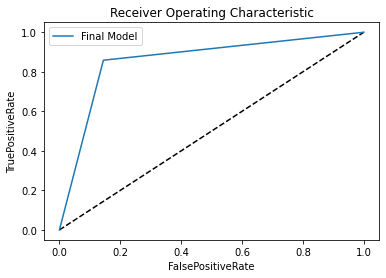

In [136]:
y_pred_fin = final.predict(x_test)
fpr , tpr, thresholds = roc_curve(y_test, y_pred_fin)




plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Final Model")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

Saving the model .pkl file

In [137]:
import joblib
joblib.dump(final,"Census_Income.pkl")

['Census_Income.pkl']